In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

data = pd.read_csv('/content/diabetes.csv')

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x = data.drop(columns = 'Outcome')
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay

Decision Tree Training Accuracy: 100.00%
Decision Tree Accuracy: 76.62%

Precision:  60.78431372549019
Recall:  65.95744680851064
F1 Score:  63.26530612244897
ROC_AUC Score :  0.7363292901173195

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154



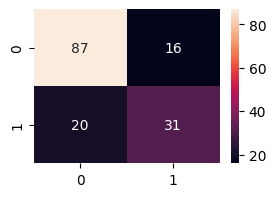

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print("Decision Tree Training Accuracy: {:.2f}%".format(dt.score(x_train, y_train)*100))
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))
print("\nPrecision: ", precision_score(y_test,y_pred)*100)
print("Recall: ", recall_score(y_test,y_pred)*100)
print("F1 Score: ", f1_score(y_test,y_pred)*100)
print("ROC_AUC Score : ",roc_auc_score(y_test, y_pred))

print("\nDecision Tree Classification Report: \n", classification_report(y_test,y_pred))

plt.figure(figsize = (3,2))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
plt.show()